In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # для графиков
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Общий анализ датасета


In [ ]:

df = pd.read_csv('googleplaystore.csv')

print(df.dtypes)
df.loc[df.App=='Tiny Scanner - PDF Scanner App']
df[df.duplicated(keep='first')]
df.drop_duplicates(subset='App', inplace=True)

print(len(df))

df.sample(5)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
9660


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
174,English translation from Bengali,BOOKS_AND_REFERENCE,4.5,527,2.9M,"100,000+",Free,0,Everyone,Books & Reference,"March 31, 2018",14.0,4.0 and up
1131,"Stocks, Forex, Bitcoin, Ethereum: Portfolio & ...",FINANCE,4.6,157505,Varies with device,"5,000,000+",Free,0,Everyone,Finance,"August 1, 2018",Varies with device,Varies with device
6867,Schulman B.V.,SHOPPING,4.0,6,20M,100+,Free,0,Everyone,Shopping,"September 14, 2016",1.0,4.1 and up
1964,GUNSHIP BATTLE: Helicopter 3D,GAME,4.3,2151039,75M,"50,000,000+",Free,0,Teen,Action,"August 1, 2018",2.6.61,4.0.3 and up


## Очистка данных
 - Конвертируем размеры приложений в MB
 - Убираем '+' из 'Number of Installs'


In [ ]:

# - Скачивания : Убираем + и ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
print(type(df['Installs'].values))


<class 'numpy.ndarray'>


In [ ]:
# - Размер : Убираем 'M', 'k' и разделение

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

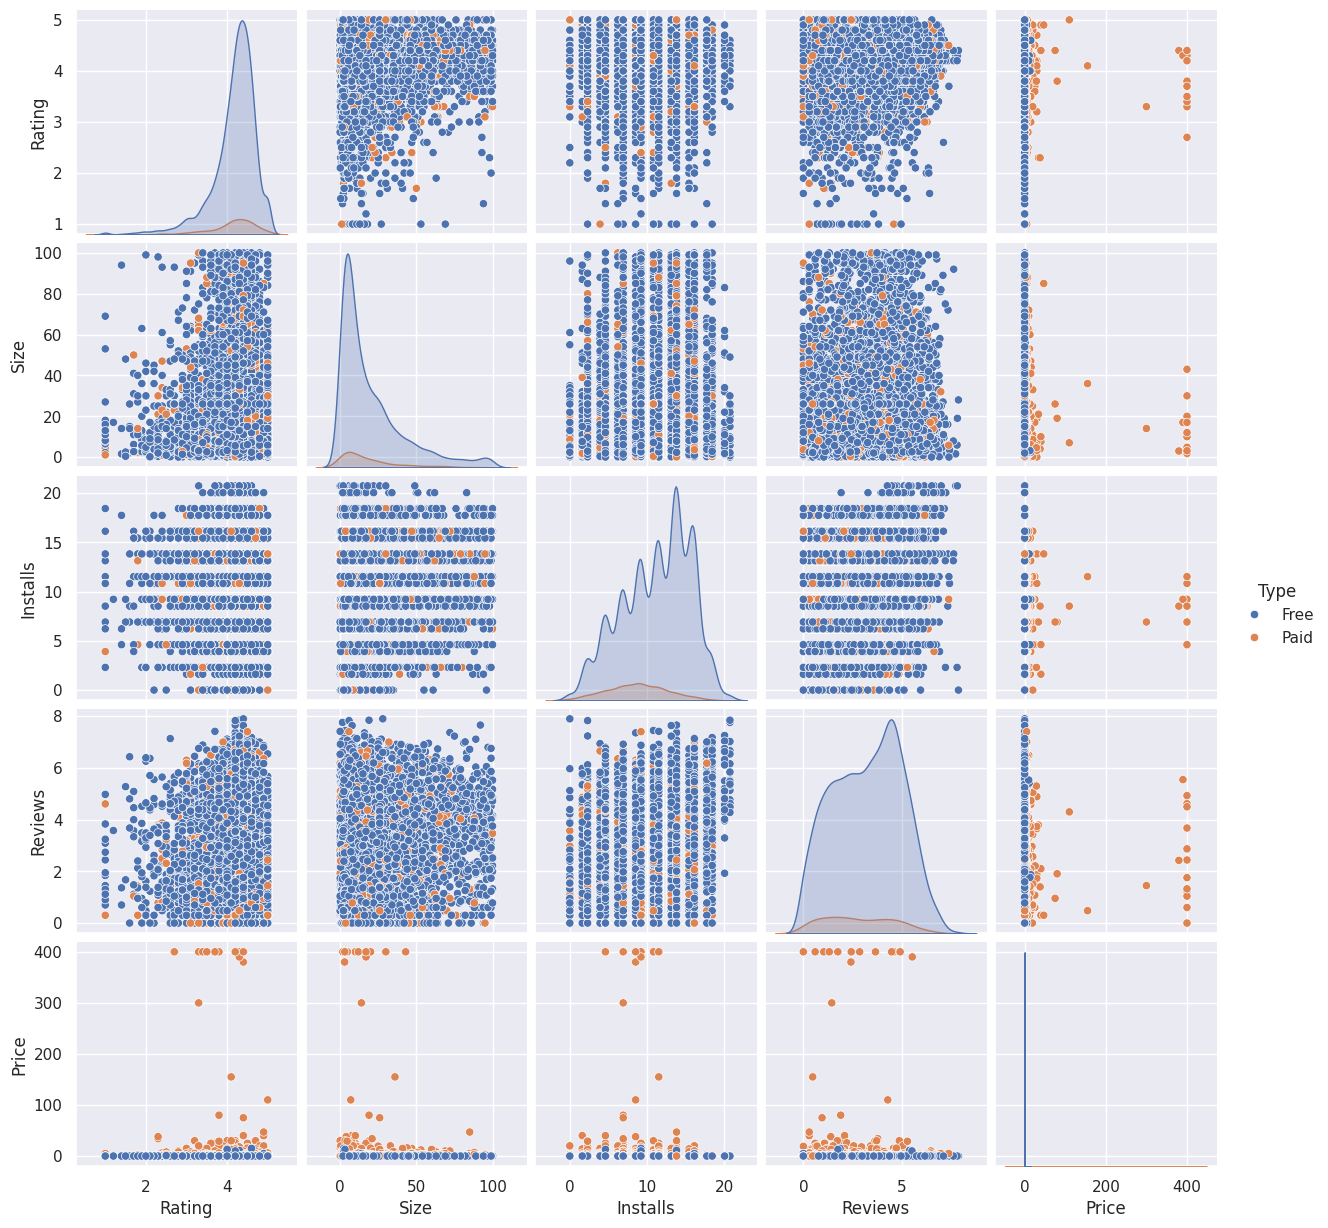

In [ ]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

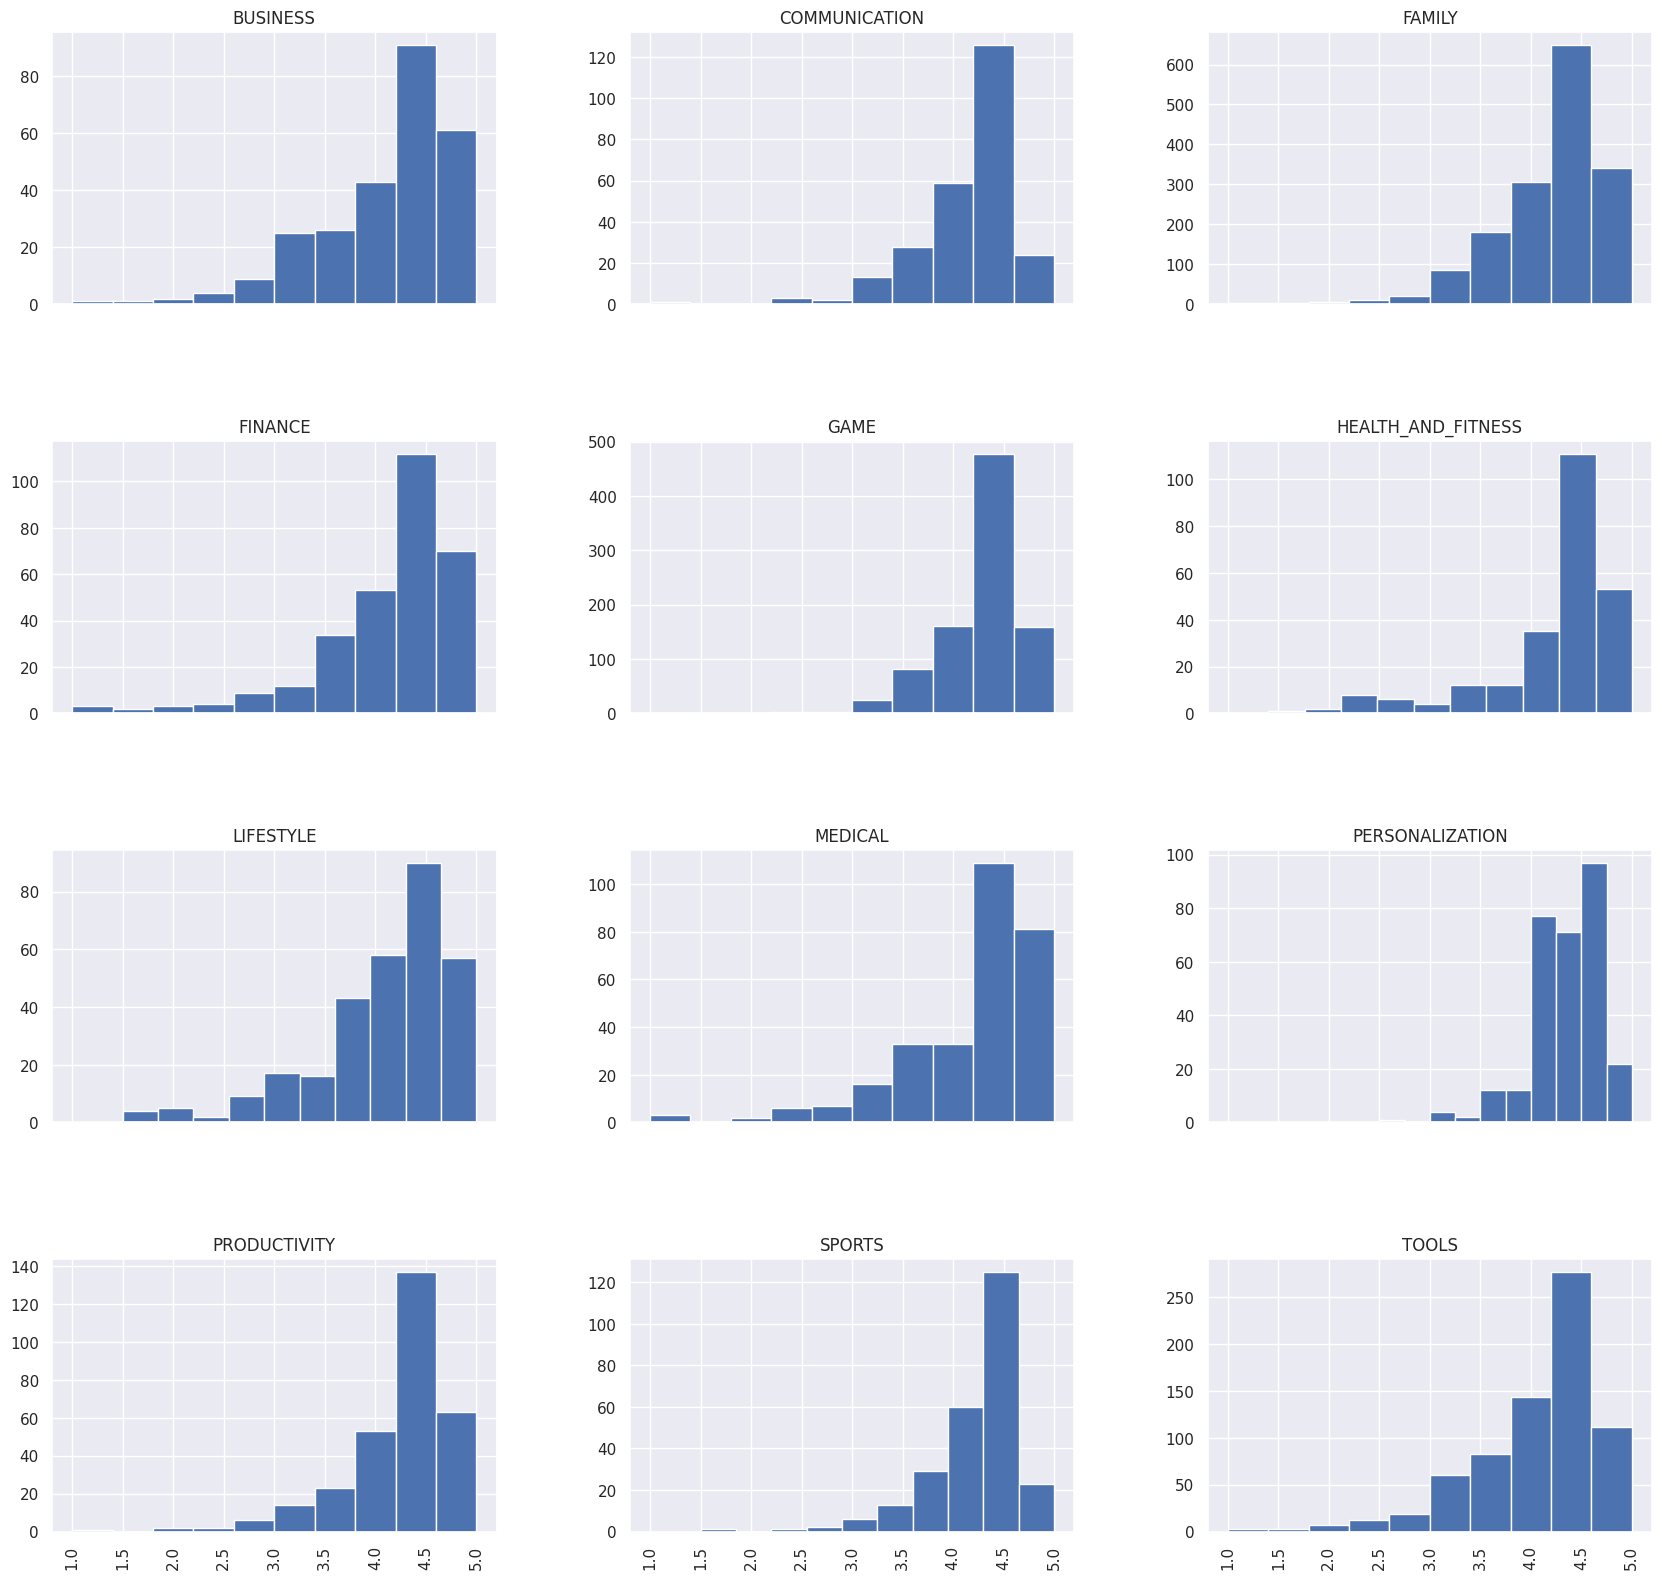

In [ ]:
groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

Количество приложений :  9659


<Axes: >

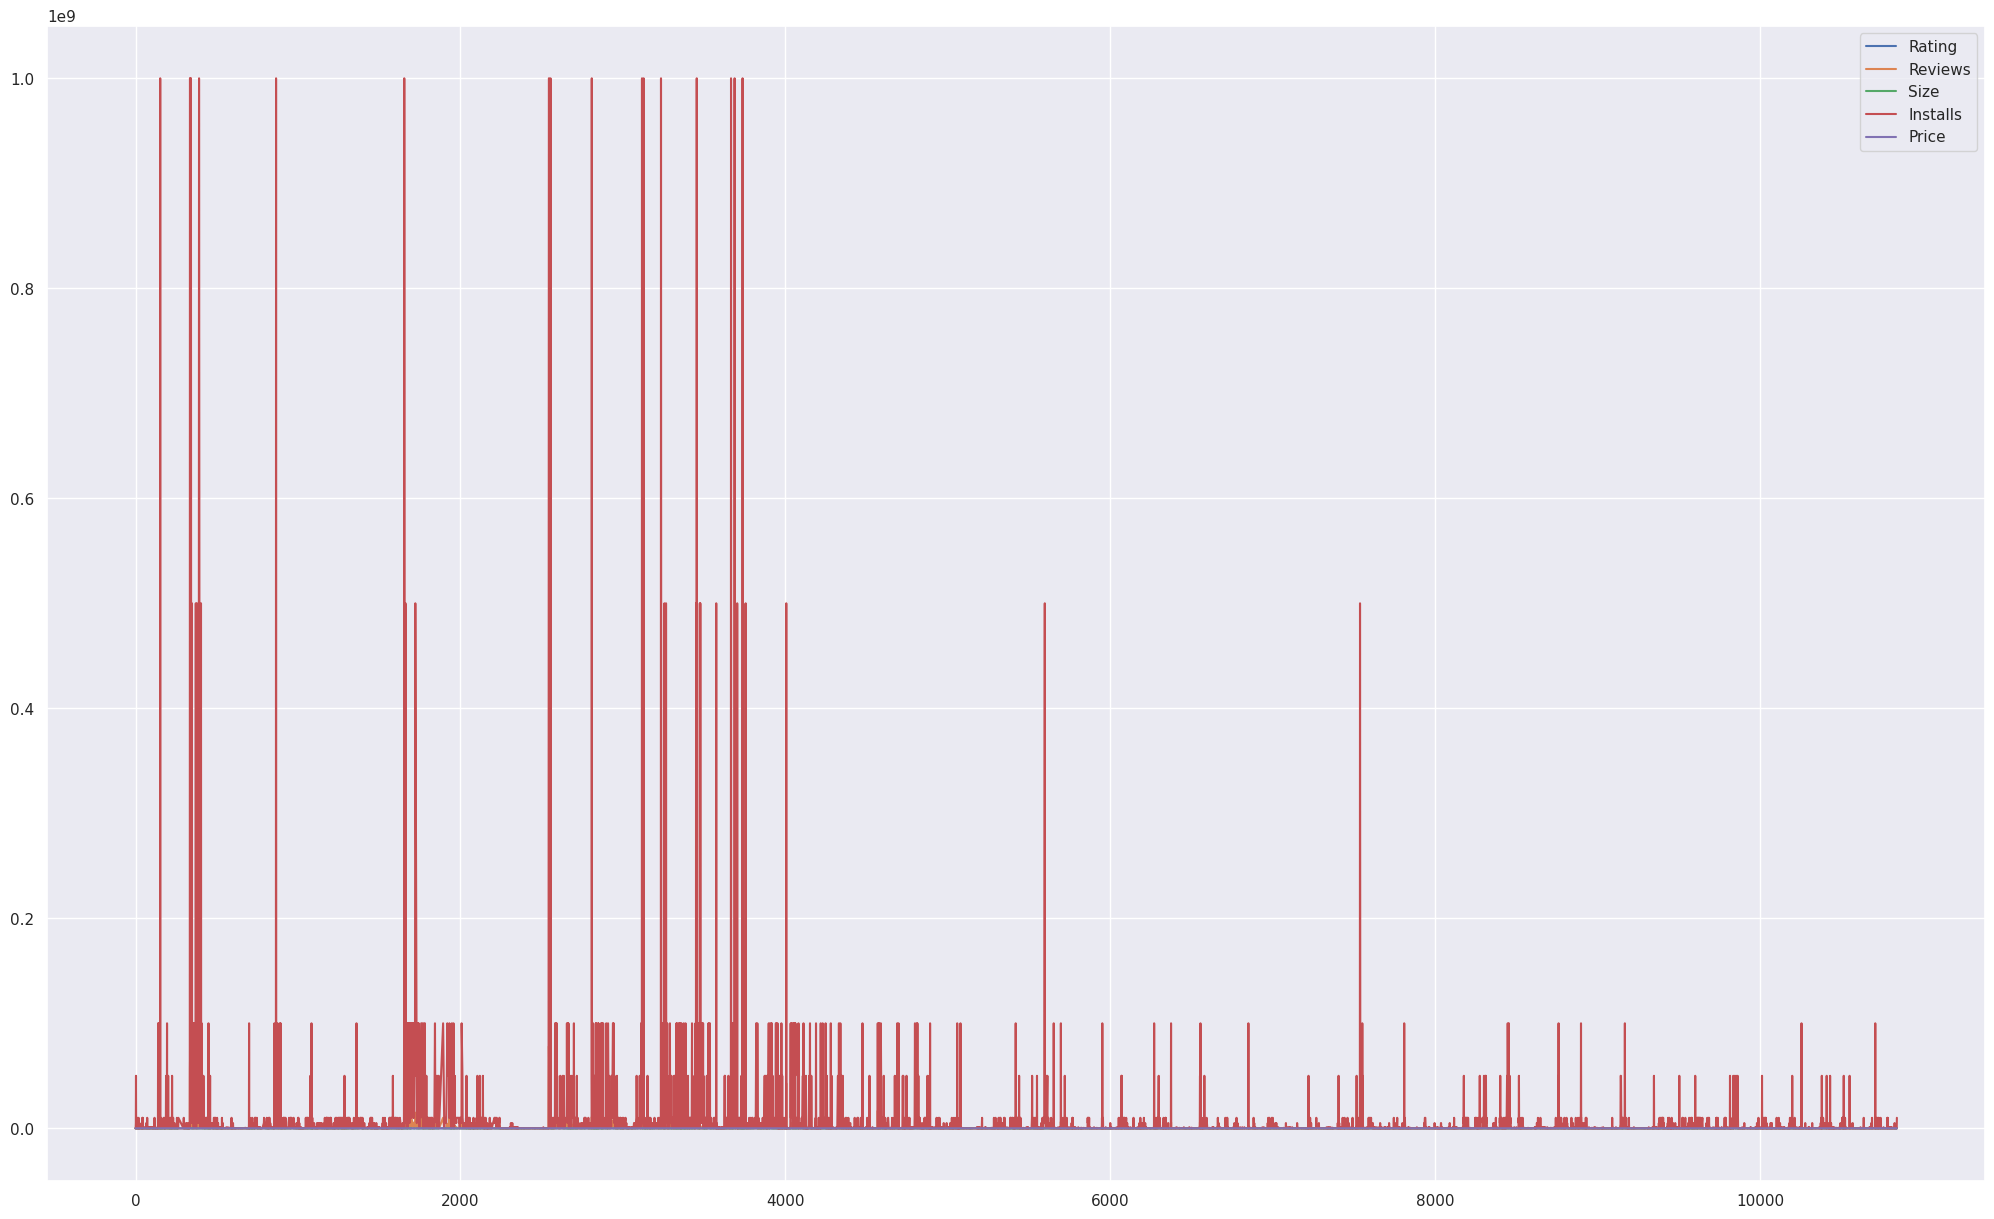

In [ ]:
print('Количество приложений : ' , len(df))
df.plot()

# Как размер влияет на рейтинг

In [ ]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

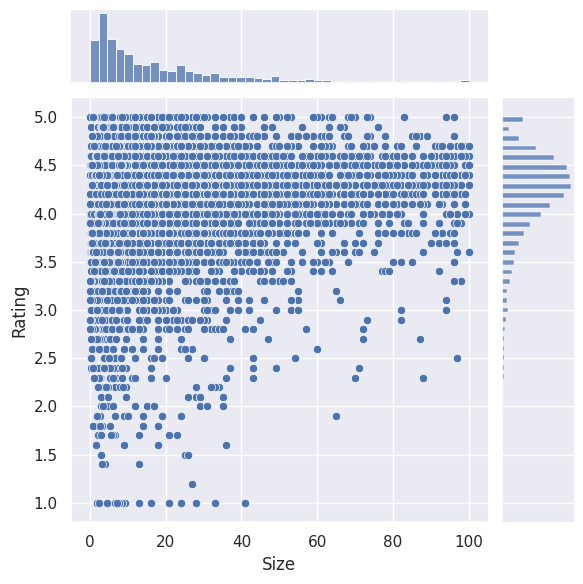

In [ ]:
sns.set_style("darkgrid")
ax = sns.jointplot(x=df['Size'],y=df['Rating'])

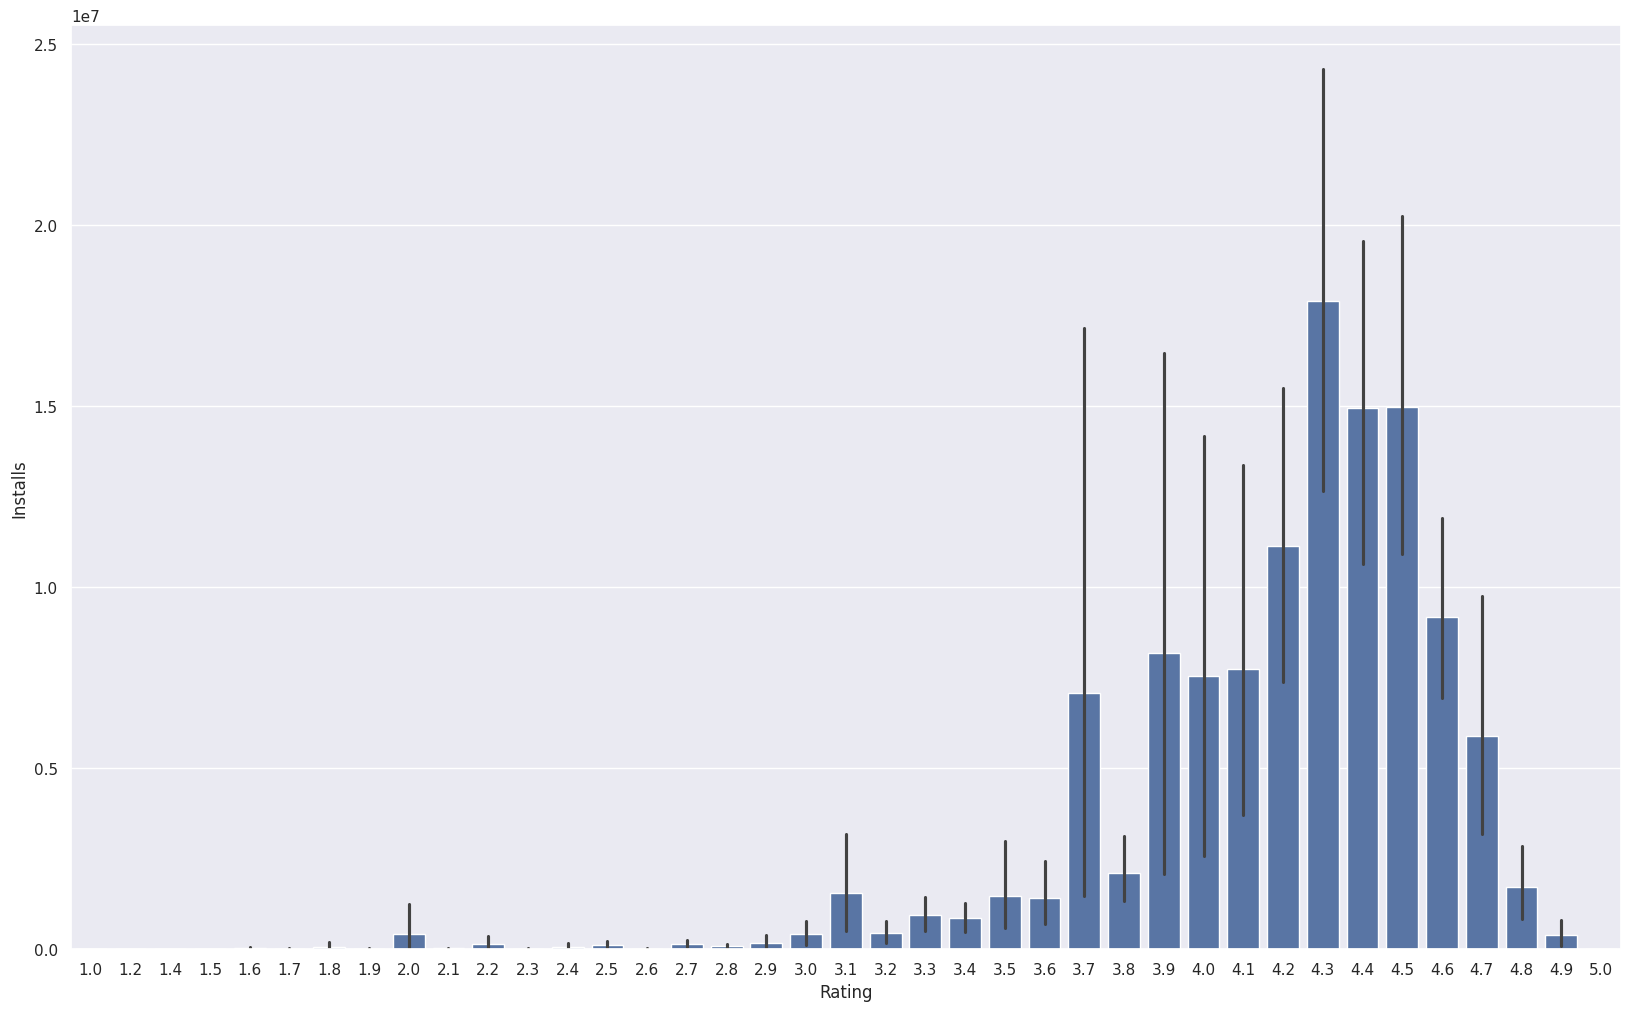

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set_style("darkgrid")
ax = sns.barplot(x=df['Rating'],y=df['Installs'])

## Топ категорий

[None, None, None, None, None, None, None, None]

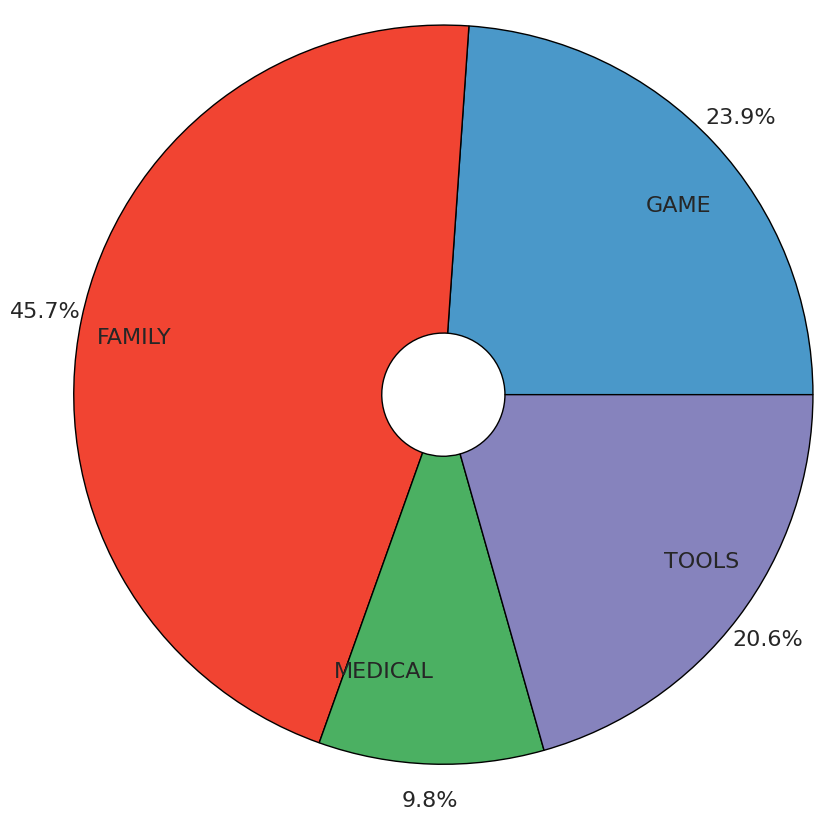

In [ ]:
new_df = df.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df.App[df.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=1, edgecolor='black')


                    Distribution of free and paid apps across major categories

# Кореляционная зависмость


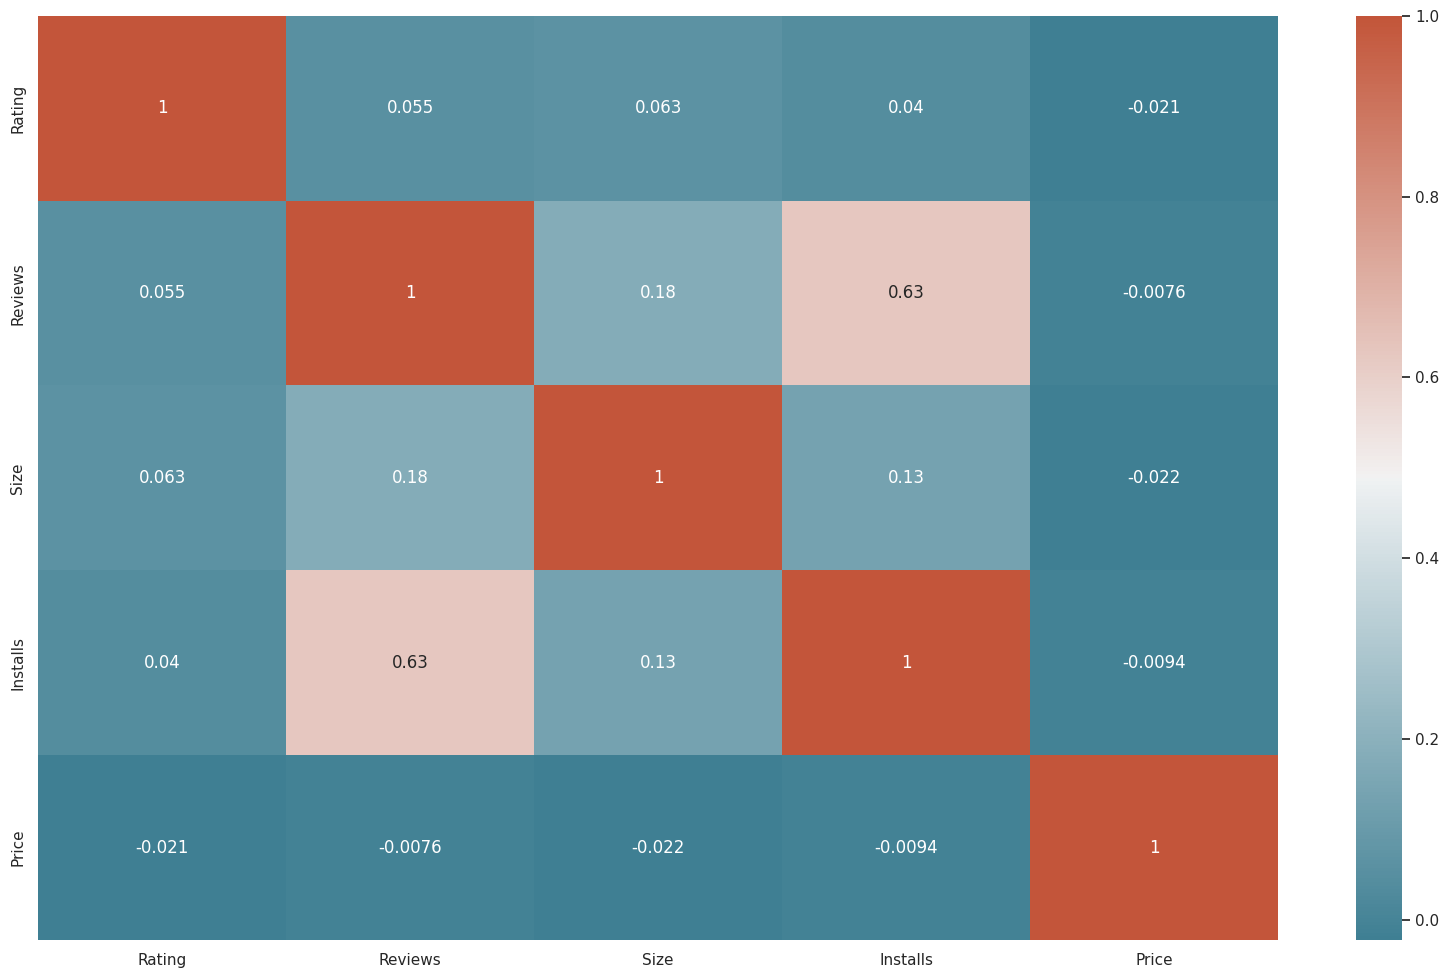

In [ ]:
df['Installs'].corr(df['Reviews'])#df['Insta


corrmat = df.corr()
f, ax = plt.subplots()
f.set_size_inches(20, 12)
sns.set_style("darkgrid")
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))